# Bike Sharing Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv("hour.csv",index_col=0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# shape of the dataset
df.shape

(17379, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [5]:
# summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


## Data Preprocessing

In [6]:
df_processed = df.copy()

In [7]:
# make dictionary to map categories
season_mapping = {1:"springer", 2:"summer", 3:"fall", 4:"winter"}
year_mapping  = {0: 2011, 1:2012}
weekday_mapping = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
weather_mapping = {1:'Clear',2:'Cloudy',3:'Rainy',4:'Heavy_Rain'}

In [8]:
df_processed["season"] = df_processed["season"].apply(lambda x: season_mapping[x])
df_processed["yr"] = df_processed["yr"].apply(lambda x: year_mapping[x])
df_processed["weekday"] = df_processed["weekday"].apply(lambda x: weekday_mapping[x])
df_processed["weathersit"] = df_processed["weathersit"].apply(lambda x: weather_mapping[x])

In [9]:
df_processed["hum"] = df_processed["hum"]*100
df_processed["windspeed"] = df_processed["windspeed"]*67

In [10]:
df_processed.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,springer,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16
2,2011-01-01,springer,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40
3,2011-01-01,springer,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32
4,2011-01-01,springer,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13
5,2011-01-01,springer,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1


In [11]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 2.3+ MB


In [12]:
(df_processed.casual + df_processed.registered == df_processed.cnt).sum()

17379

In [13]:
df_processed.dtypes

dteday         object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [14]:
#df_processed.to_csv("Bike_Data_Processed.csv")

## Exploratory Data Analysis

In [15]:
%matplotlib inline

In [16]:
sns.set()

C:\Users\vashi\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vashi\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


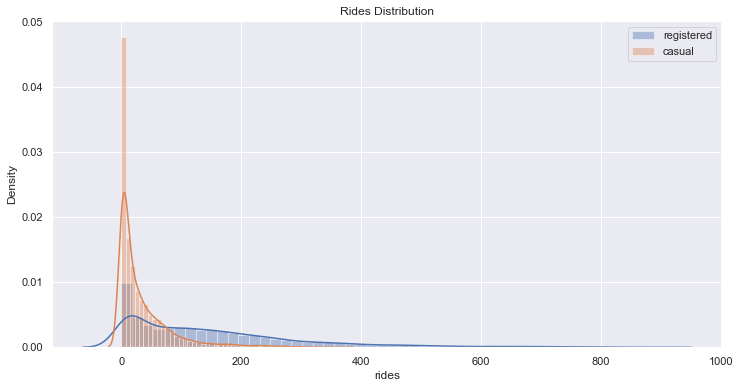

In [19]:
plt.figure(figsize=(12,6))

sns.distplot(df_processed['registered'], label='registered')

sns.distplot(df_processed['casual'], label='casual')

plt.legend()

plt.xlabel('rides')

plt.title('Rides Distribution')

plt.show()

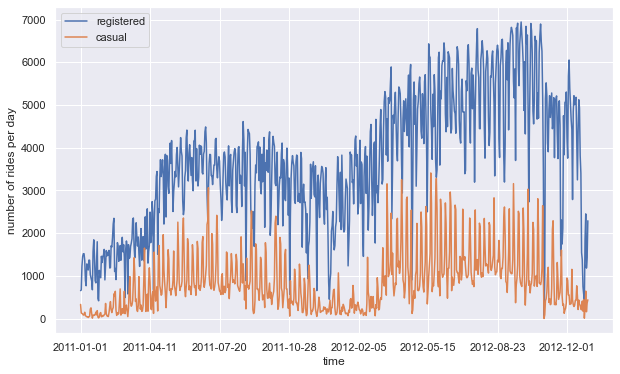

In [20]:
plot_data = df_processed[['registered', 'casual', 'dteday']]


ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))

ax.set_xlabel("time")

ax.set_ylabel("number of rides per day")

plt.show()

Text(0, 0.5, 'number of rides per day')

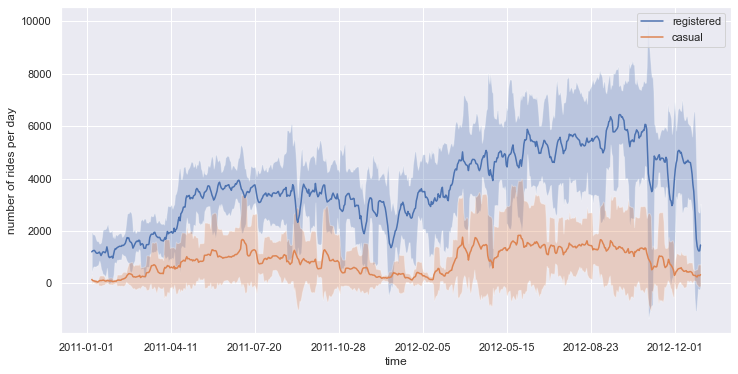

In [28]:
# there is lots of variations so make little smooth by rolling mean
plot_data.groupby('dteday').sum()

window = 7

rolling_mean = plot_data.rolling(window).mean()

rolling_dev = plot_data.rolling(window).std()

ax = rolling_mean.plot(figsize=(12,6))

ax.fill_between(rolling_mean.index,
                rolling_mean["registered"]+2*rolling_dev["registered"],
                rolling_mean["registered"]-2*rolling_dev["registered"],
                alpha = 0.3)

ax.fill_between(rolling_mean.index,
               rolling_mean['casual']+2*rolling_dev['casual'],
               rolling_mean['casual']-2*rolling_dev['casual'],
               alpha = 0.3)

ax.set_xlabel("time")

ax.set_ylabel("number of rides per day")

C:\Users\vashi\anaconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


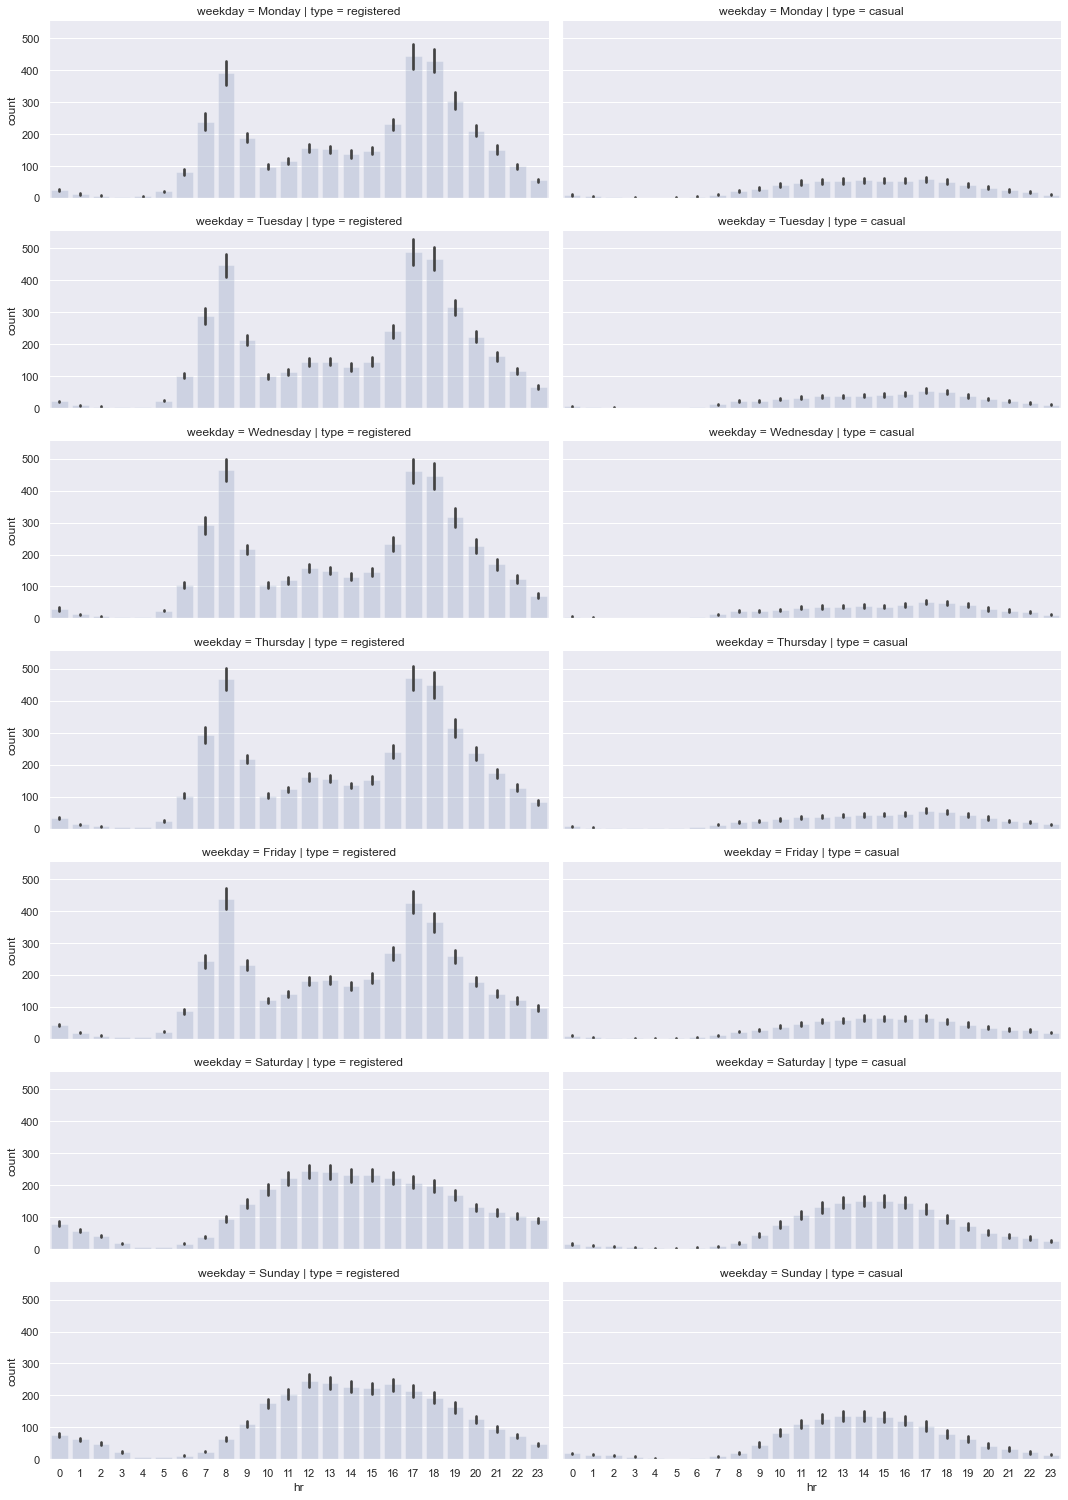

In [32]:
# see counts of bike hourly in a week
plot_data  = df_processed[['hr','weekday','registered','casual']]

plot_data = plot_data.melt(id_vars = ['hr','weekday'],var_name='type',value_name = 'count')

grid = sns.FacetGrid(plot_data, row = 'weekday', col = 'type',
                     row_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    aspect = 2.5)

grid.map(sns.barplot,'hr','count',alpha=0.2)

In [36]:
df_processed.weathersit.value_counts()

Clear         11413
Cloudy         4544
Rainy          1419
Heavy_Rain        3
Name: weathersit, dtype: int64

C:\Users\vashi\anaconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


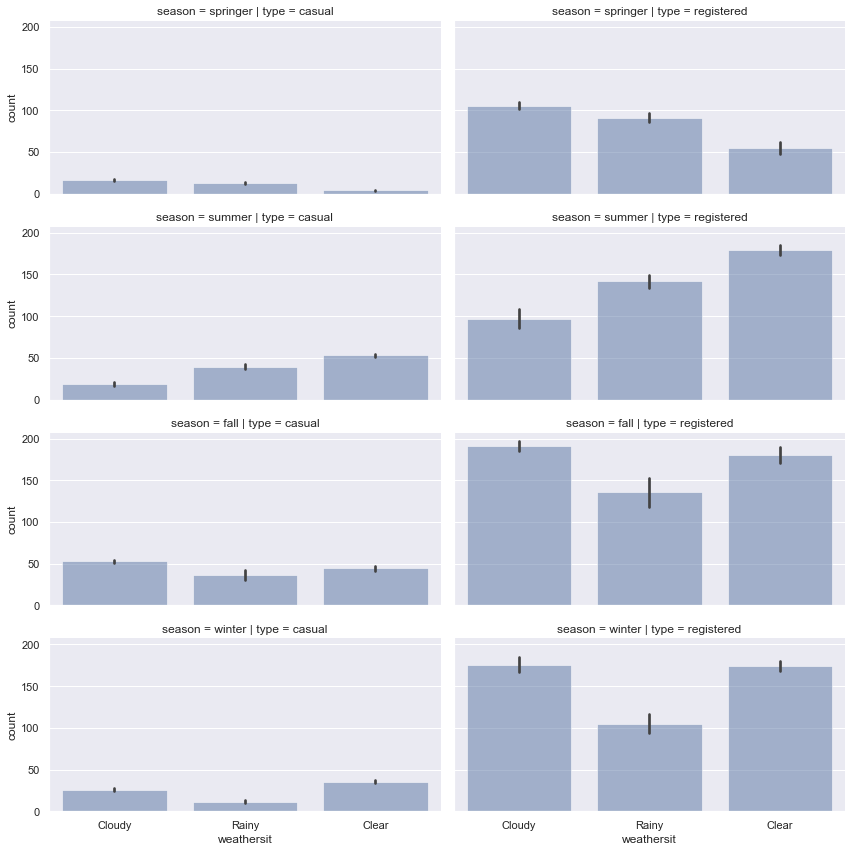

In [39]:
# plot data for weather conditions
plot_data = df_processed[['season','weathersit','casual','registered']]

plot_data = plot_data.melt(id_vars = ['season','weathersit'],
                           var_name = 'type',
                           value_name = 'count')

grid = sns.FacetGrid(plot_data, row = 'season', 
                     col = 'type', 
                     aspect = 2, 
                     row_order = ['springer','summer','fall','winter'])

grid.map(sns.barplot, 'weathersit', 'count', alpha = 0.5)

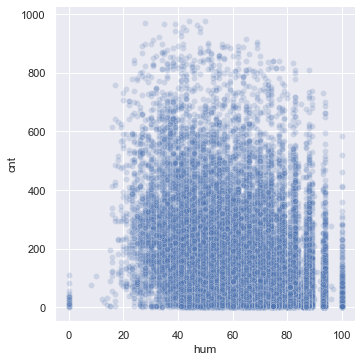

In [48]:
# relational plots
sns.relplot(x='hum',y='cnt', data = df_processed,alpha=0.2)